In [1]:
from skimage.io import imread, imshow
import cv2
import numpy as np
from skimage.morphology import skeletonize_3d
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

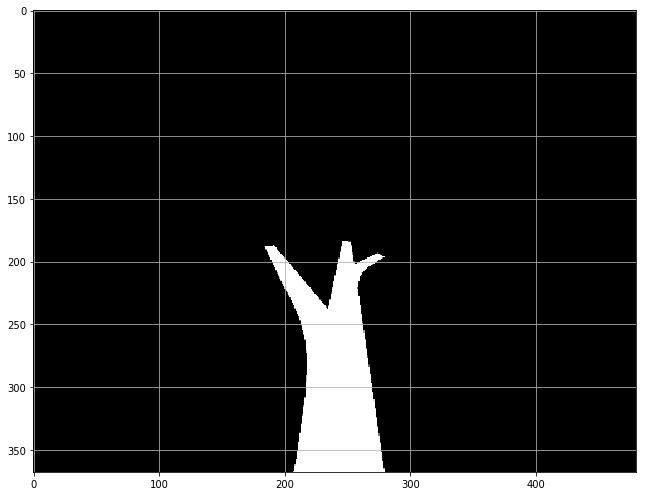

In [15]:
init_img = imread('7.png')
plt.figure(figsize=(9,7))
plt.grid()
init_img[240:280, 200:240] == [128, 0, 255]
imshow(init_img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


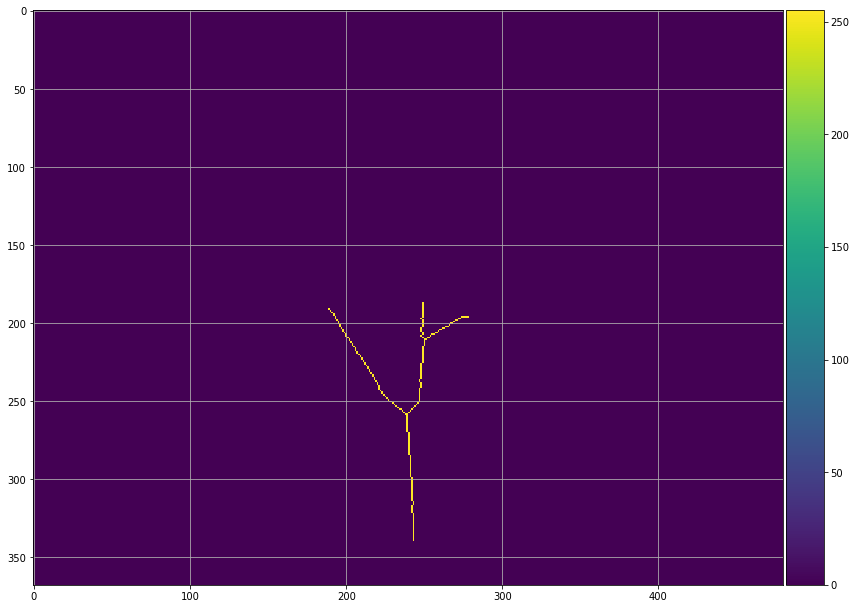

In [3]:
plt.figure(figsize=(12,9))
plt.grid()
img = imread('7.png', as_gray=True)
skel = skeletonize_3d(img)
imshow(skel)
print(skel)

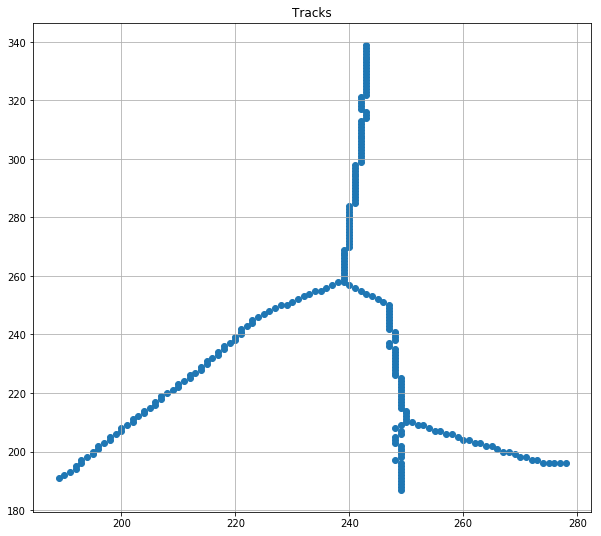

In [4]:
def get_all_sceleton_coords(skel):
    skel_coords_xs, skel_coords_ys = [], []
    for x in range(skel.shape[0]):
        for y in range(skel.shape[1]):
            if skel[x, y] > 0:
                skel_coords_xs.append(x)
                skel_coords_ys.append(y)
                
    return skel_coords_xs, skel_coords_ys


xs, ys = get_all_sceleton_coords(skel)
plt.figure(figsize=(10, 9))
plt.title('Tracks')
plt.grid()
plt.scatter(ys, xs)
plt.plot();

In [51]:
import numpy as np
from operator import itemgetter


unique, counts = np.unique(xs, return_counts=True)
d = dict(zip(unique, counts))
xs_max = sorted(d.items(), key=itemgetter(1), reverse=True)
print(ys_max)

[(249, 29), (243, 22), (242, 21), (248, 19), (240, 16), (241, 15), (239, 12), (247, 11), (250, 5), (221, 3), (192, 2), (193, 2), (195, 2), (196, 2), (198, 2), (200, 2), (202, 2), (204, 2), (206, 2), (207, 2), (210, 2), (212, 2), (214, 2), (215, 2), (217, 2), (218, 2), (220, 2), (223, 2), (189, 1), (190, 1), (191, 1), (194, 1), (197, 1), (199, 1), (201, 1), (203, 1), (205, 1), (208, 1), (209, 1), (211, 1), (213, 1), (216, 1), (219, 1), (222, 1), (224, 1), (225, 1), (226, 1), (227, 1), (228, 1), (229, 1), (230, 1), (231, 1), (232, 1), (233, 1), (234, 1), (235, 1), (236, 1), (237, 1), (238, 1), (244, 1), (245, 1), (246, 1), (251, 1), (252, 1), (253, 1), (254, 1), (255, 1), (256, 1), (257, 1), (258, 1), (259, 1), (260, 1), (261, 1), (262, 1), (263, 1), (264, 1), (265, 1), (266, 1), (267, 1), (268, 1), (269, 1), (270, 1), (271, 1), (272, 1), (273, 1), (274, 1), (275, 1), (276, 1), (277, 1), (278, 1)]


In [26]:
width = img.shape[0]
height = img.shape[1]

max_tracks_num = 3   # Максимальное количество путей с ветвлениями на дороге
d = {}
k = 20 # kernel_size
for x in range(0, height, k):
    for y in range(0, width, k):
        curr_arr = img[x:x+k, y:y+k].ravel()
        pix_num = len(curr_arr[curr_arr > 0])
        d['{}, {}'.format((x, y), (x+k, y+k))] = pix_num


pixels_num = list(d.values())
pixels_num = sorted(pixels_num, reverse=True)[:max_tracks_num*2-2]
print(pixels_num)

areas_to_check = []
for coords, pixnum in d.items():
    if pixnum in pixels_num:
        areas_to_check.append(coords)
print(areas_to_check)

[400, 400, 400, 400]
['(240, 220), (260, 240)', '(240, 240), (260, 260)', '(260, 220), (280, 240)', '(260, 240), (280, 260)', '(280, 220), (300, 240)', '(280, 240), (300, 260)', '(300, 220), (320, 240)', '(300, 240), (320, 260)', '(320, 220), (340, 240)', '(320, 240), (340, 260)', '(340, 220), (360, 240)', '(340, 240), (360, 260)']


In [6]:


def make_second_pass(areas_to_check):
    
    d = {}
    k2 = 10 # kernel size
    for area in areas_to_check:
        first_x = int(area.split('), (')[0][1:].split(', ')[0])
        first_y = int(area.split('), (')[0][1:].split(', ')[1])
        second_x = int(area.split('), (')[1][:-1].split(', ')[0])
        second_y = int(area.split('), (')[1][:-1].split(', ')[1])
        
        print(first_x, first_y)
        #img[first_x:second_x, first_y:second_y] = [220, 20, 60]
        #imshow(img)
    
make_second_pass(areas_to_check)    

240 200
280 240
320 200
320 240


In [7]:
width = img.shape[0]
height = img.shape[1]


for x in range(20, width-20*5, 20):
    for y in range(20, height-20*5, 20):
        
        print('x: {} -> {}, y: {} -> {}'.format(x, x+20, y, y+20),
              sum(img[x:x+20].ravel()), sum(img[y:y+20].ravel()))

x: 20 -> 40, y: 20 -> 40 0.0 0.0
x: 20 -> 40, y: 40 -> 60 0.0 0.0
x: 20 -> 40, y: 60 -> 80 0.0 0.0
x: 20 -> 40, y: 80 -> 100 0.0 0.0
x: 20 -> 40, y: 100 -> 120 0.0 0.0
x: 20 -> 40, y: 120 -> 140 0.0 0.0
x: 20 -> 40, y: 140 -> 160 0.0 0.0
x: 20 -> 40, y: 160 -> 180 0.0 0.0
x: 20 -> 40, y: 180 -> 200 0.0 339.3490196078431
x: 20 -> 40, y: 200 -> 220 0.0 774.1803921568628
x: 20 -> 40, y: 220 -> 240 0.0 926.5764705882355
x: 20 -> 40, y: 240 -> 260 0.0 991.6666666666666
x: 20 -> 40, y: 260 -> 280 0.0 966.7490196078433
x: 20 -> 40, y: 280 -> 300 0.0 1017.6196078431371
x: 20 -> 40, y: 300 -> 320 0.0 1104.6
x: 20 -> 40, y: 320 -> 340 0.0 1217.1529411764704
x: 20 -> 40, y: 340 -> 360 0.0 1332.0470588235296
x: 20 -> 40, y: 360 -> 380 0.0 569.164705882353
x: 40 -> 60, y: 20 -> 40 0.0 0.0
x: 40 -> 60, y: 40 -> 60 0.0 0.0
x: 40 -> 60, y: 60 -> 80 0.0 0.0
x: 40 -> 60, y: 80 -> 100 0.0 0.0
x: 40 -> 60, y: 100 -> 120 0.0 0.0
x: 40 -> 60, y: 120 -> 140 0.0 0.0
x: 40 -> 60, y: 140 -> 160 0.0 0.0
x: 40 ->

x: 220 -> 240, y: 300 -> 320 926.5764705882355 1104.6
x: 220 -> 240, y: 320 -> 340 926.5764705882355 1217.1529411764704
x: 220 -> 240, y: 340 -> 360 926.5764705882355 1332.0470588235296
x: 220 -> 240, y: 360 -> 380 926.5764705882355 569.164705882353
x: 240 -> 260, y: 20 -> 40 991.6666666666666 0.0
x: 240 -> 260, y: 40 -> 60 991.6666666666666 0.0
x: 240 -> 260, y: 60 -> 80 991.6666666666666 0.0
x: 240 -> 260, y: 80 -> 100 991.6666666666666 0.0
x: 240 -> 260, y: 100 -> 120 991.6666666666666 0.0
x: 240 -> 260, y: 120 -> 140 991.6666666666666 0.0
x: 240 -> 260, y: 140 -> 160 991.6666666666666 0.0
x: 240 -> 260, y: 160 -> 180 991.6666666666666 0.0
x: 240 -> 260, y: 180 -> 200 991.6666666666666 339.3490196078431
x: 240 -> 260, y: 200 -> 220 991.6666666666666 774.1803921568628
x: 240 -> 260, y: 220 -> 240 991.6666666666666 926.5764705882355
x: 240 -> 260, y: 240 -> 260 991.6666666666666 991.6666666666666
x: 240 -> 260, y: 260 -> 280 991.6666666666666 966.7490196078433
x: 240 -> 260, y: 280 ->

In [8]:
width = img.shape[0]
height = img.shape[1]
for w in range(0, width, 20):
    for h in range(0, height, 20):
        
        row = img[0:w, :].ravel()
        column = img[:, 0:h].ravel()
        
        print('w: {}, h: {}'.format(w, h))
        
        #counter_row += len(row[row>0])
        #counter_column += len(column[column>0])
        #print('w: {}, h: {}, pixels: {}'.format(w, h, counter_row+counter_column))
        

w: 0, h: 0
w: 0, h: 20
w: 0, h: 40
w: 0, h: 60
w: 0, h: 80
w: 0, h: 100
w: 0, h: 120
w: 0, h: 140
w: 0, h: 160
w: 0, h: 180
w: 0, h: 200
w: 0, h: 220
w: 0, h: 240
w: 0, h: 260
w: 0, h: 280
w: 0, h: 300
w: 0, h: 320
w: 0, h: 340
w: 0, h: 360
w: 0, h: 380
w: 0, h: 400
w: 0, h: 420
w: 0, h: 440
w: 0, h: 460
w: 20, h: 0
w: 20, h: 20
w: 20, h: 40
w: 20, h: 60
w: 20, h: 80
w: 20, h: 100
w: 20, h: 120
w: 20, h: 140
w: 20, h: 160
w: 20, h: 180
w: 20, h: 200
w: 20, h: 220
w: 20, h: 240
w: 20, h: 260
w: 20, h: 280
w: 20, h: 300
w: 20, h: 320
w: 20, h: 340
w: 20, h: 360
w: 20, h: 380
w: 20, h: 400
w: 20, h: 420
w: 20, h: 440
w: 20, h: 460
w: 40, h: 0
w: 40, h: 20
w: 40, h: 40
w: 40, h: 60
w: 40, h: 80
w: 40, h: 100
w: 40, h: 120
w: 40, h: 140
w: 40, h: 160
w: 40, h: 180
w: 40, h: 200
w: 40, h: 220
w: 40, h: 240
w: 40, h: 260
w: 40, h: 280
w: 40, h: 300
w: 40, h: 320
w: 40, h: 340
w: 40, h: 360
w: 40, h: 380
w: 40, h: 400
w: 40, h: 420
w: 40, h: 440
w: 40, h: 460
w: 60, h: 0
w: 60, h: 20
w: 60, h:

In [9]:


#for w in range(0, img.shape[0], 20):
#    c = sum(img[0:w, 0:w])
#    print(len(c[c>0]))

In [10]:
x_step = 20   # шаг сетки по оси x
y_step = 20   # шаг сетки по оси y

sum_ = 0
for w in range(0, img.shape[0], 20):
    for h in range(0, img.shape[1], 20):
        sum_ += len(sum(sum(img[w:h], img[w:h])))
        sum_ = 0

TypeError: object of type 'int' has no len()

In [ ]:
def get_all_sceleton_coords(skel):
    skel_coords = []
    for x in range(skel.shape[0]):
        for y in range(skel.shape[1]):
            if skel[x, y] > 0:
                skel_coords.append([x, y])
    return skel_coords

skel_coords = get_all_sceleton_coords(skel)
branches = []
for n, coord in enumerate(skel_coords):
    # Мы пробегаем по координатам найденного скелета и 
    # смотрим на _номер_ последнего из пикселей, разница с соседним которого < 1
    
    # Почему последнего? Потому что если представить скелет как дерево, там нужно считать от его корня
    if skel_coords[n][0]-skel_coords[n-1][0] < 1:
        branches.append(skel_coords[n])
print(branches[-1])